# EDA, Data Pre-Processing & Engineering

## Import Modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from data_processor import *
from feature_engineering import *
%matplotlib inline


Bad key text.latex.preview in file C:\Users\topgi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\topgi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\topgi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

## Load Raw Data

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [3]:
train["furnishing"] = train["furnishing"] \
    .replace({'unspecified': np.nan}) \
    .replace({'na': np.nan})
train['listing_id'] = train['listing_id'].astype(str)

## Data Pre-Processing & Feature Engineering

In [4]:
data_processor = DataProcessor()
train_cleaned = data_processor.fit(X=train)
test_cleaned = data_processor.transform(X=test)

features = generate_all_features(data_directory="../data")

train_with_features = train_cleaned.merge(features, on='subzone', how='left')
train_with_features.to_csv("../data/train_with_features.csv", index=False)

test_with_features = test_cleaned.merge(features, on='subzone', how='left')
test_with_features.to_csv("../data/test_with_features.csv", index=False)

## Number of Records & Features (Raw Data)

In [5]:
print(train.shape)
print(test.shape)

(20254, 21)
(6966, 20)


## Column Data Types (Raw Data)

In [6]:
train.dtypes

listing_id               object
title                    object
address                  object
property_name            object
property_type            object
tenure                   object
built_year              float64
num_beds                float64
num_baths               float64
size_sqft                 int64
floor_level              object
furnishing               object
available_unit_types     object
total_num_units         float64
property_details_url     object
lat                     float64
lng                     float64
elevation                 int64
subzone                  object
planning_area            object
price                   float64
dtype: object

## Number of Missing Values (Raw)

In [7]:
n = train.shape[0]
missing_dic = {}
for col in train.columns:
    num_missing = sum(train[col].isna())
    if num_missing > 0:
        missing_dic.update({col: num_missing})

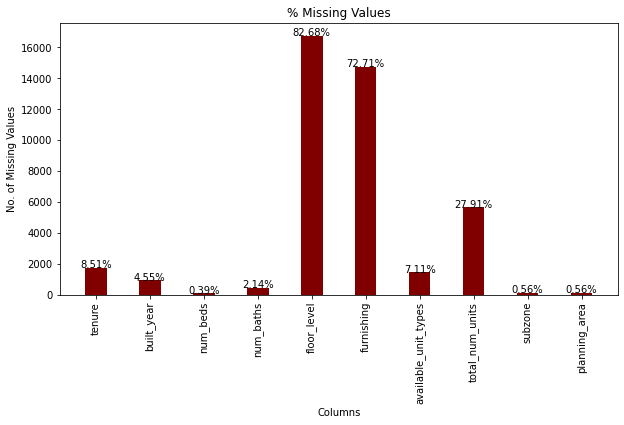

In [8]:
fig = plt.figure(figsize = (10, 5))

x = list(missing_dic.keys())
y = list(missing_dic.values())
# creating the bar plot
plt.bar(
    x, 
    y, 
    color ='maroon',
    width = 0.4
)

for i in range(len(x)):
    plt.text(i,y[i],f"{round(y[i]/n*100,2)}%", ha = 'center')

plt.xlabel("Columns")
plt.ylabel("No. of Missing Values")
plt.title("% Missing Values")
plt.xticks(rotation=90)
plt.show()

## Number of Unique Values (Raw)

In [9]:
n = train.shape[0]
unique_dic = {}
for col in train.columns:
    num_unique = train[col].nunique()
    unique_dic.update({col: num_unique})

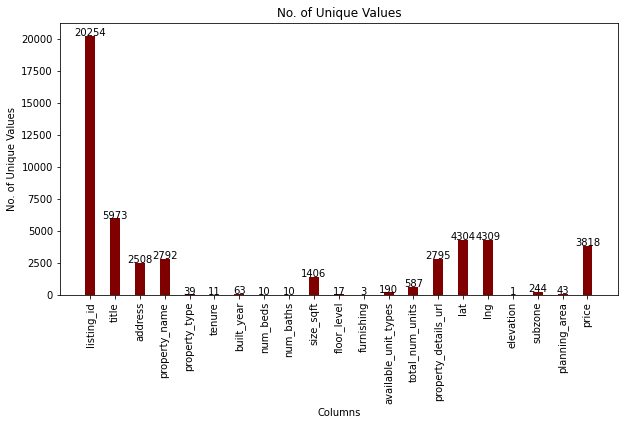

In [10]:
fig = plt.figure(figsize = (10, 5))

x = list(unique_dic.keys())
y = list(unique_dic.values())
# creating the bar plot
plt.bar(
    x, 
    y, 
    color ='maroon',
    width = 0.4
)

for i in range(len(x)):
    plt.text(i,y[i],y[i], ha = 'center')

plt.xlabel("Columns")
plt.ylabel("No. of Unique Values")
plt.title("No. of Unique Values")
plt.xticks(rotation=90)
plt.show()

In [11]:
uniq = pd.DataFrame([unique_dic.keys(), unique_dic.values()]).T
uniq.columns = ['columns', 'nunique']
uniq
# uniq.sort_values("nunique", ascending=False)

,columns,nunique
0,listing_id,20254
1,title,5973
2,address,2508
3,property_name,2792
4,property_type,39
5,tenure,11
6,built_year,63
7,num_beds,10
8,num_baths,10
9,size_sqft,1406


## Value Counts of property_type (Processed)

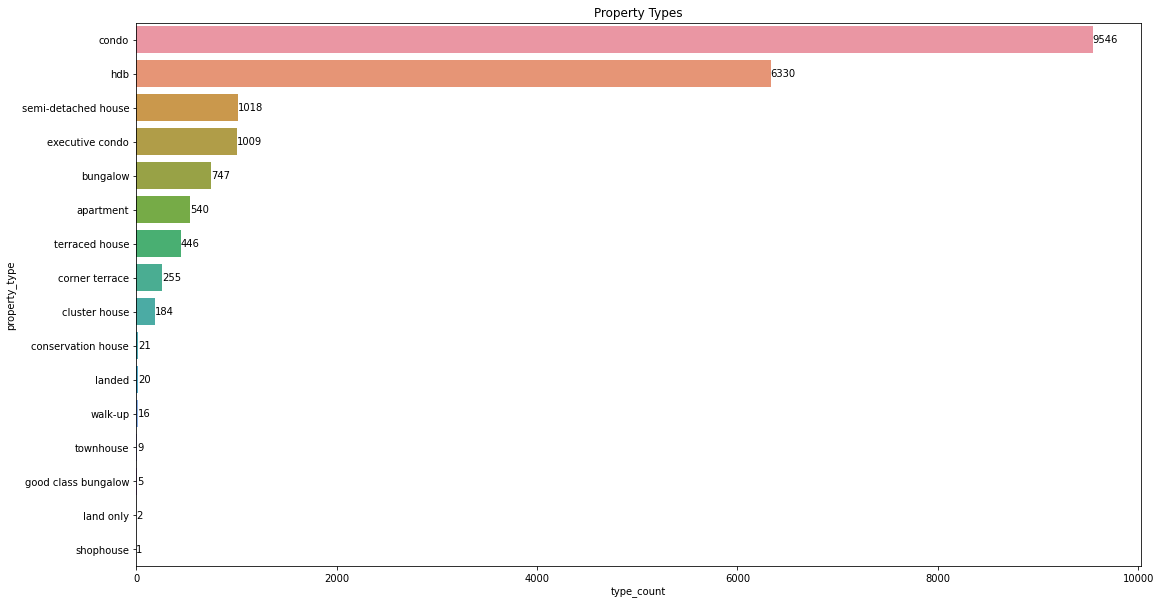

In [12]:
fig, ax = plt.subplots(figsize = (18, 10))
property_types = train_cleaned['property_type'].value_counts().to_frame().reset_index()
property_types.columns = ['property_type', 'type_count']

ax.set_title('Property Types')
sns.barplot(x = 'type_count', y = 'property_type', data = property_types)
ax.bar_label(ax.containers[0])

plt.show()

## price Distribution w.r.t. property_type

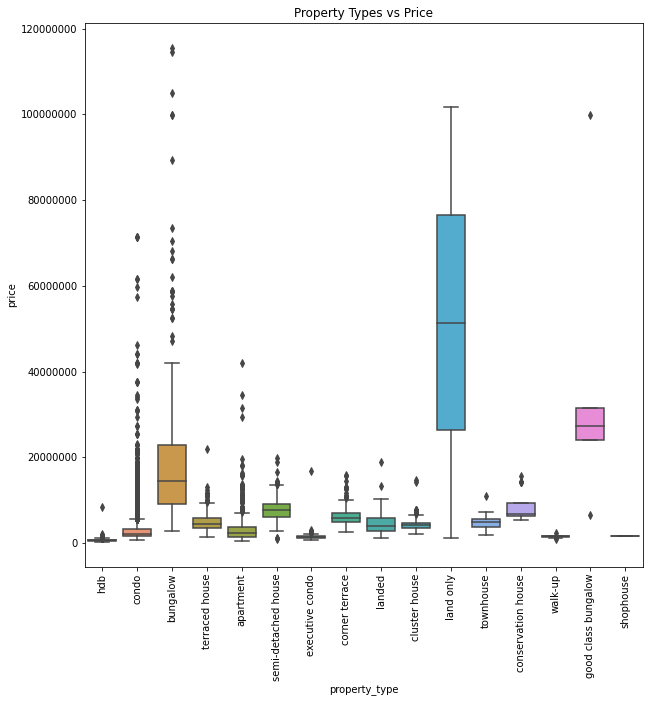

In [13]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.ticklabel_format(style = 'plain', axis = 'y')
ax.tick_params(axis='x', rotation=90)
#sns.set(font_scale = 1.1)

ax.set_title('Property Types vs Price')
sns.boxplot(x = 'property_type', y = 'price', data = train_cleaned)

plt.show()

## Value Counts of tenure

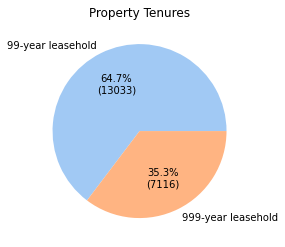

In [14]:
# Source: matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html
sns_colours = sns.color_palette('pastel')

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize = (8, 4))
property_tenure = train_cleaned['tenure'].value_counts().to_frame().reset_index()
property_tenure.columns = ['property_tenure', 'tenure_count']

ax.set_title('Property Tenures')
plt.pie(property_tenure['tenure_count'], labels = property_tenure['property_tenure'], colors = sns_colours, autopct = lambda pct: func(pct, property_tenure['tenure_count']))

plt.show()

## size_sqft Distribution w.r.t. num_beds

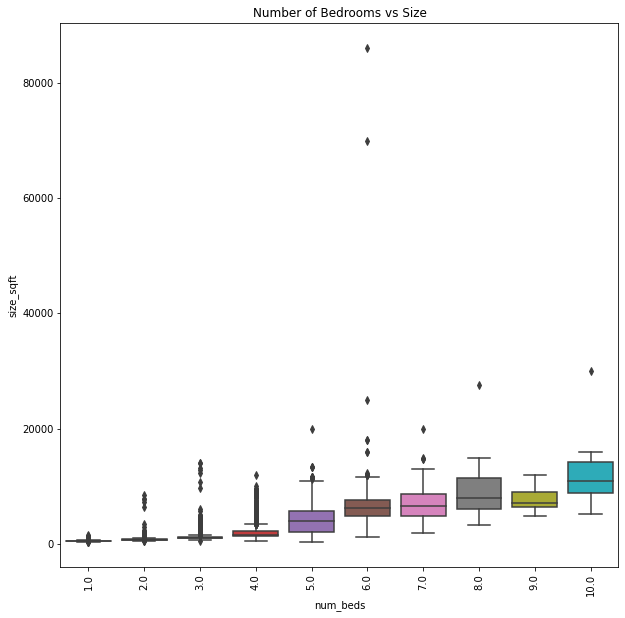

In [15]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.ticklabel_format(style = 'plain', axis = 'y')
ax.tick_params(axis='x', rotation=90)
#sns.set(font_scale = 1.1)

ax.set_title('Number of Bedrooms vs Size')
sns.boxplot(x = 'num_beds', y = 'size_sqft', data = train_cleaned)

plt.show()

## size_sqft Distribution w.r.t. num_baths

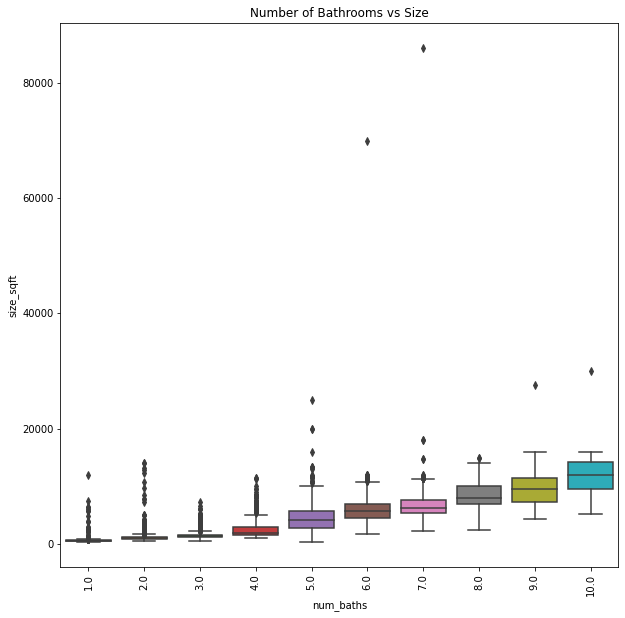

In [16]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.ticklabel_format(style = 'plain', axis = 'y')
ax.tick_params(axis='x', rotation=90)
#sns.set(font_scale = 1.1)

ax.set_title('Number of Bathrooms vs Size')
sns.boxplot(x = 'num_baths', y = 'size_sqft', data = train_cleaned)

plt.show()

## size_sqft Scatter Plot (Processed)

<AxesSubplot:xlabel='size_sqft', ylabel='price'>

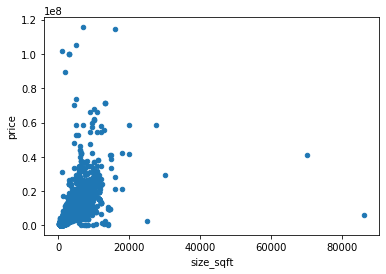

In [17]:
train_cleaned.plot(kind='scatter', x='size_sqft',y='price')

## Number of Records & Features (Feature Engineered Data)

In [18]:
print(train_with_features.shape)
print(test_with_features.shape)

(20149, 57)
(6966, 56)


## Column Data Types (Feature Engineered Data)

In [19]:
train_with_features.dtypes

listing_id                           object
title                                object
address                              object
property_name                        object
property_type                        object
tenure                               object
num_beds                            float64
num_baths                           float64
size_sqft                           float64
property_details_url                 object
lat                                 float64
lng                                 float64
subzone                              object
price                               float64
age                                 float64
years_remaining                     float64
subzone_area_size                   float64
subzone_population                    int64
planning_area                        object
planning_area_area_size             float64
planning_area_population              int64
planning_area_population_density    float64
subzone_population_density      

## Feature Correlation (Feature Engineered Data)

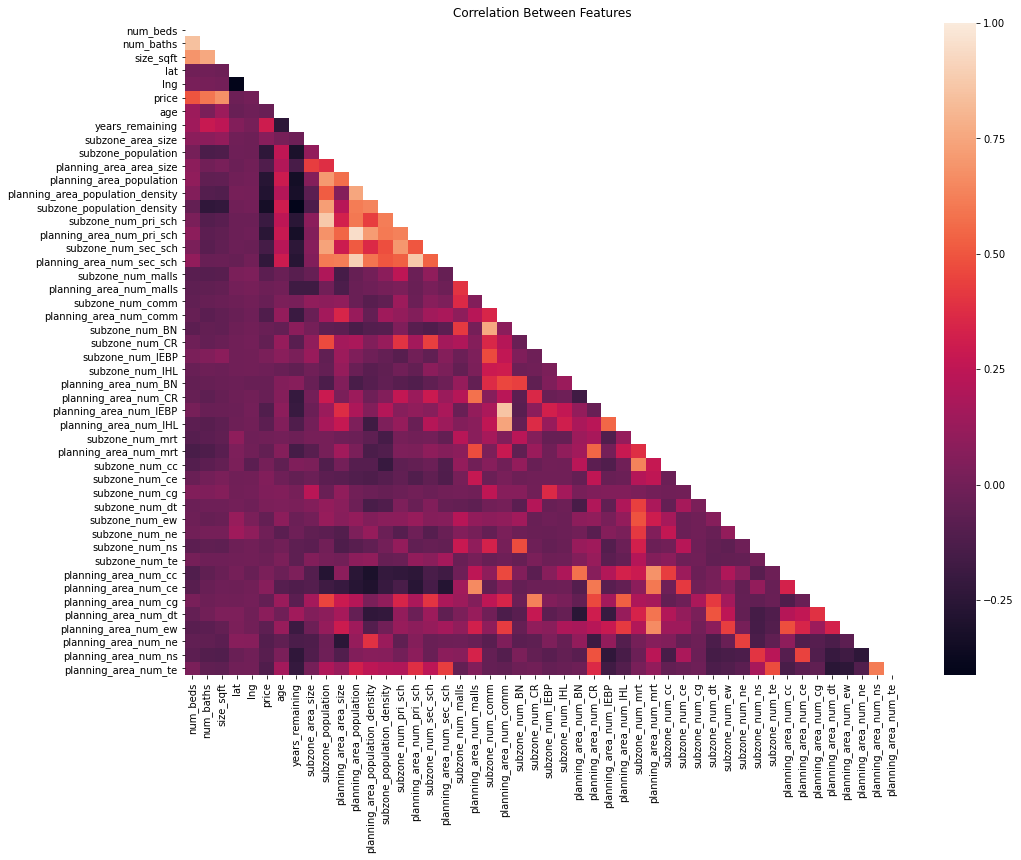

In [20]:
fig, ax = plt.subplots(figsize = (16, 12))

ax.set_title('Correlation Between Features')
sns.heatmap(train_with_features.corr(), mask = np.triu(train_with_features.corr()))

plt.show()